In [50]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


## Importing the Libraries

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")

## Importing the Data

In [52]:
df_train =  pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
df_train.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1440,1441,70,RL,79.0,11526,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,191000
378,379,20,RL,88.0,11394,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,New,Partial,394432
149,150,50,RM,NaN,6240,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,115000
120,121,80,RL,NaN,21453,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,10,2006,WD,Normal,180000
270,271,60,FV,84.0,10728,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2006,New,Partial,266000
876,877,20,RL,94.0,25286,Pave,NaN,Reg,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,132250
795,796,60,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal,171000
955,956,90,RH,82.0,7136,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,145000
994,995,20,RL,96.0,12456,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,337500
53,54,20,RL,68.0,50271,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,385000


In [53]:
df_test =  pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv', nrows = 2_000_000)
df_test.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
316,1777,30,RL,80.0,8480,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,WD,Normal
1344,2805,30,RL,55.0,8250,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1276,2737,20,RL,82.0,9888,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2006,WD,Normal
1129,2590,120,RL,46.0,4054,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2007,WD,Normal
1308,2769,20,RL,70.0,7000,Pave,NaN,Reg,Lvl,AllPub,...,162,0,NaN,NaN,NaN,0,7,2006,WD,Normal
38,1499,160,FV,24.0,2544,Pave,Pave,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
1277,2738,90,RL,NaN,8917,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2006,WD,Normal
631,2092,50,RM,63.0,7628,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal
362,1823,30,C (all),72.0,9392,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2009,WD,Abnorml
1046,2507,20,RL,93.0,10481,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2007,New,Partial


## Exploratory Data Analysis

In [54]:
df_train.shape

(1460, 81)

In [55]:
df_train = df_train.iloc[:,1:]

In [56]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [57]:
df_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Handling Missing Values

In [58]:
print(df_train.isna().sum())

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64


In [59]:
df_train = df_train.fillna({'LotFrontage': df_train['LotFrontage'].mean(), 'Alley':'None','MasVnrType':'none' ,'MasVnrArea':0,'BsmtQual':'None','BsmtCond':'None','BsmtExposure':'None', 'BsmtFinType1':'None','BsmtFinType2':'None','Electrical': df_train['Electrical'].mode(),'FireplaceQu':'None','GarageType':'None','GarageYrBlt':'None', 'GarageFinish':'None','GarageQual':'None','GarageCond':'None','PoolQC':'None', 'Fence':'None', 'MiscFeature':'None','BsmtFullBath':0, 'BsmtFinSF1':0,'BsmtFinSF2':0,'BsmtUnfSF':0,'TotalBsmtSF':0,'BsmtHalfBath':0,'GarageCars':0,'GarageArea':0})
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [60]:
df_test = df_test.fillna({'LotFrontage': df_train['LotFrontage'].mean(), 'Alley':'None','MasVnrType':'none' ,'MasVnrArea':0,'BsmtQual':'None','BsmtCond':'None','BsmtExposure':'None', 'BsmtFinType1':'None','BsmtFinType2':'None','Electrical': df_train['Electrical'].mode(),'FireplaceQu':'None','GarageType':'None','GarageYrBlt':'None', 'GarageFinish':'None','GarageQual':'None','GarageCond':'None','PoolQC':'None', 'Fence':'None', 'MiscFeature':'None','BsmtFullBath':0, 'BsmtFinSF1':0,'BsmtFinSF2':0,'BsmtUnfSF':0,'TotalBsmtSF':0,'BsmtHalfBath':0,'GarageCars':0,'GarageArea':0})
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,None,Reg,Lvl,AllPub,...,120,0,None,MnPrv,None,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,None,IR1,Lvl,AllPub,...,0,0,None,MnPrv,None,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,None,IR1,HLS,AllPub,...,144,0,None,None,None,0,1,2010,WD,Normal


In [61]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## Handling Outliers

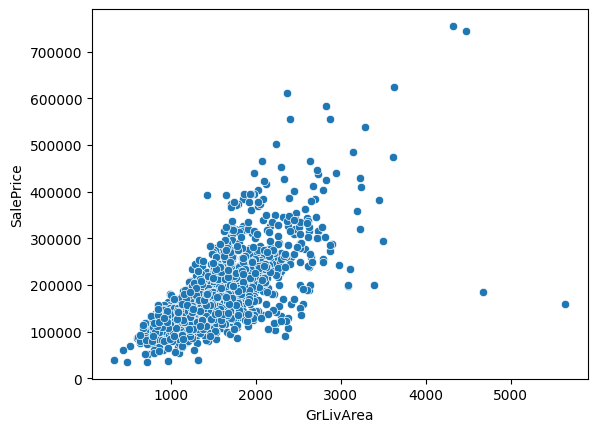

In [62]:
sns.scatterplot(x='GrLivArea',y='SalePrice', data=df_train)
plt.show()

In [63]:
df_train = df_train[df_train['GrLivArea']<4000]

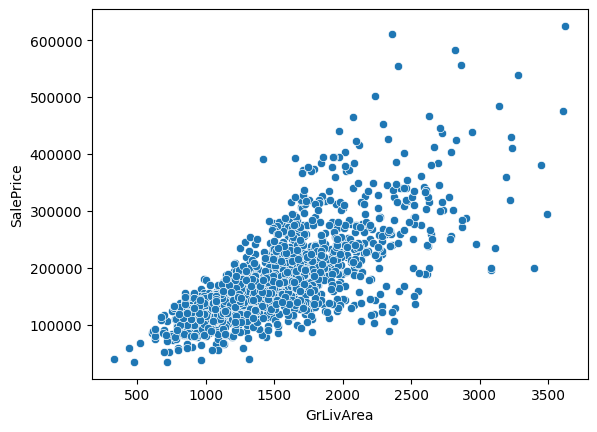

In [64]:
sns.scatterplot(x='GrLivArea',y='SalePrice', data=df_train)
plt.show()

## Correlation Between Features

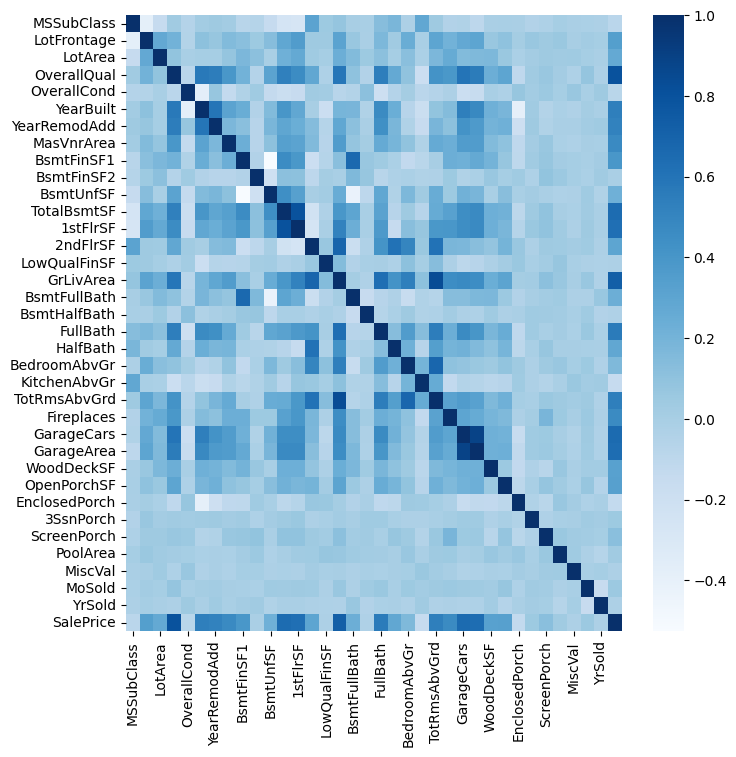

In [65]:
numeric_df = df_train.select_dtypes(include='number')
plt.figure(figsize=(8,8))
df_corr = numeric_df.corr()
sns.heatmap(df_corr, cmap='Blues')
plt.show()

## SalePrice Distribution

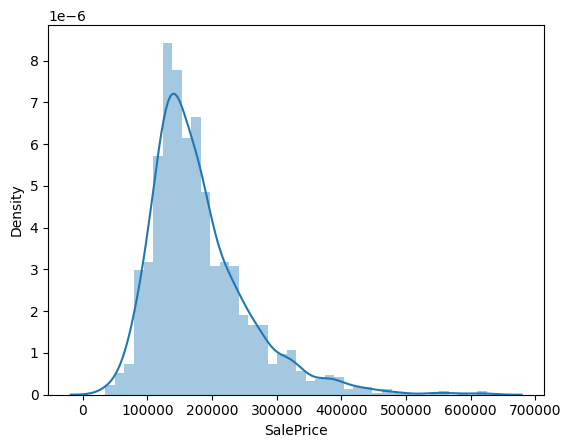

In [66]:
sns.distplot(df_train['SalePrice'])
plt.show()

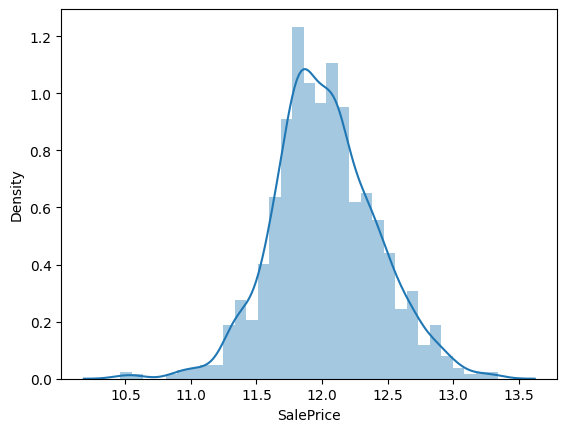

In [67]:
df_train["SalePrice"] = np.log1p(df_train["SalePrice"])
sns.distplot(df_train['SalePrice'])
plt.show()

## Encoding Categorical Variables

In [68]:
df_train['MSSubClass'] = df_train['MSSubClass'].apply(str)
df_train['OverallCond'] = df_train['OverallCond'].astype(str)
df_train['YrSold'] = df_train['YrSold'].astype(str)
df_train['MoSold'] = df_train['MoSold'].astype(str)

In [69]:
from sklearn.preprocessing import LabelEncoder
cols = ('MSZoning','LandContour','FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold','Utilities','LotConfig','Neighborhood','Condition1','Condition2',
       'BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType',
        'Foundation','Electrical','GarageType','GarageCond','MiscFeature','SaleType','SaleCondition',
       'Heating','GarageYrBlt')
 
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(df_train[c].values)+list(df_test[c].values)) 
    df_train[c] = lbl.transform(list(df_train[c].values))
    df_test[c] = lbl.transform(list(df_test[c].values))

In [70]:
X = df_train.iloc[:,:-1]
y = df_train.iloc[:,-1]
X["TotalSF"] = df_train["TotalBsmtSF"] + df_train["1stFlrSF"] + df_train["2ndFlrSF"]
X["TotalBath"] = df_train["FullBath"] + 0.5*df_train["HalfBath"] + df_train["BsmtFullBath"] + 0.5*df_train["BsmtHalfBath"]
X["TotalPorchSF"] = df_train["OpenPorchSF"] + df_train["EnclosedPorch"] + df_train["3SsnPorch"] + df_train["ScreenPorch"]
X["QualGrLiv"] = df_train["OverallQual"] * df_train["GrLivArea"]
X["QualTotalSF"] = df_train["OverallQual"] * X["TotalSF"]
X["HouseAge"] = df_train["YrSold"] - df_train["YearBuilt"]
X["SinceRemod"] = df_train["YrSold"] - df_train["YearRemodAdd"]
X["GarageAge"] = df_train["YrSold"] - df_train["GarageYrBlt"]
X["TotalBsmtBath"] = df_train["BsmtFullBath"] + 0.5*df_train["BsmtHalfBath"]
X["OverallQual2"] = df_train["OverallQual"] ** 2
X["OverallQual3"] = df_train["OverallQual"] ** 3

df_test["TotalSF"] = df_test["TotalBsmtSF"] + df_test["1stFlrSF"] + df_test["2ndFlrSF"]
df_test["TotalBath"] = df_test["FullBath"] + 0.5*df_test["HalfBath"] + df_test["BsmtFullBath"] + 0.5*df_test["BsmtHalfBath"]
df_test["TotalPorchSF"] = df_test["OpenPorchSF"] + df_test["EnclosedPorch"] + df_test["3SsnPorch"] + df_test["ScreenPorch"]
df_test["QualGrLiv"] = df_test["OverallQual"] * df_test["GrLivArea"]
df_test["QualTotalSF"] = df_test["OverallQual"] * df_test["TotalSF"]
df_test["HouseAge"] = df_test["YrSold"] - df_test["YearBuilt"]
df_test["SinceRemod"] = df_test["YrSold"] - df_test["YearRemodAdd"]
df_test["GarageAge"] = df_test["YrSold"] - df_test["GarageYrBlt"]
df_test["TotalBsmtBath"] = df_test["BsmtFullBath"] + 0.5*df_test["BsmtHalfBath"]
df_test["OverallQual2"] = df_test["OverallQual"] ** 2
df_test["OverallQual3"] = df_test["OverallQual"] ** 3


In [71]:

X.drop(columns=["TotalBsmtSF","1stFlrSF","2ndFlrSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","FullBath","HalfBath","BsmtFullBath","BsmtHalfBath","YearBuilt","YearRemodAdd","GarageYrBlt","YrSold","Alley"])
df_test.drop(columns=["TotalBsmtSF","1stFlrSF","2ndFlrSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","FullBath","HalfBath","BsmtFullBath","BsmtHalfBath","YearBuilt","YearRemodAdd","GarageYrBlt","YrSold" ,"Alley"])

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,TotalBath,TotalPorchSF,QualGrLiv,QualTotalSF,HouseAge,SinceRemod,GarageAge,TotalBsmtBath,OverallQual2,OverallQual3
0,1461,5,2,80.0,11622,1,3,3,0,4,...,1.0,120,4480,8890.0,-1957,-1957,-48,0.0,25,125
1,1462,5,3,81.0,14267,1,0,3,0,0,...,1.5,36,7974,15948.0,-1954,-1954,-45,0.0,36,216
2,1463,10,3,74.0,13830,1,0,3,0,4,...,2.5,34,8145,12785.0,-1993,-1994,-84,0.0,25,125
3,1464,10,3,78.0,9978,1,0,3,0,4,...,2.5,36,9624,15180.0,-1994,-1994,-85,0.0,36,216
4,1465,0,3,43.0,5005,1,0,1,0,4,...,2.0,226,10240,20480.0,-1988,-1988,-79,0.0,64,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,2,4,21.0,1936,1,3,3,0,4,...,1.5,0,4368,6552.0,-1970,-1970,-103,0.0,16,64
1455,2916,2,4,21.0,1894,1,3,3,0,4,...,1.5,24,4368,6552.0,-1970,-1970,-61,0.0,16,64
1456,2917,5,3,160.0,20000,1,3,3,0,4,...,2.0,0,6120,12240.0,-1960,-1996,-51,1.0,25,125
1457,2918,14,3,62.0,10441,1,3,3,0,4,...,1.5,32,4850,9410.0,-1992,-1992,-103,0.5,25,125


In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
param_grid = {'alpha'     : [0.1,1,10,0.01],
                'l1_ratio'  :  np.arange(0.40,1.00,0.10),
                'tol'       : [0.0001,0.001]}
en = ElasticNet()
gs = GridSearchCV(estimator=en, param_grid = param_grid, cv = 5,verbose=True,scoring='neg_mean_squared_log_error')
gs.fit(X,y)
en = gs.best_estimator_
print(gs.best_score_)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
-9.645794114850597e-05


In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
lasso = Lasso()
param_grid = {'alpha':np.logspace(-4, 2, 30)}

gs = GridSearchCV(estimator=lasso, param_grid = param_grid, cv = 5,verbose=True, scoring='neg_mean_squared_log_error')
gs.fit(X,y)
lasso = gs.best_estimator_
print(gs.best_score_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
-9.195911456988249e-05


In [74]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
xgb = XGBRegressor(n_estimators=1200, learning_rate=0.03, max_depth=3,
                       subsample=0.7, colsample_bytree=0.7,
                       reg_alpha=0.001, reg_lambda=1)
print(cross_val_score(estimator=xgb, X=X,y=y,cv=5, scoring='neg_mean_squared_log_error'))

[-7.18152492e-05 -8.37867066e-05 -9.56900331e-05 -6.60697779e-05
 -8.01708811e-05]


In [75]:
from lightgbm import LGBMRegressor
lgb = LGBMRegressor(n_estimators=2000, learning_rate=0.03, num_leaves=30,
                        colsample_bytree=0.6, subsample=0.8, reg_alpha=0.1,
                        reg_lambda=1)
print(cross_val_score(estimator=lgb, X=X,y=y,cv=5, scoring='neg_mean_squared_log_error'))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000498 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4385
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 82
[LightGBM] [Info] Start training from score 12.018763
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

In [76]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
estimators = [('Lasso', lasso), ('Elastic Net',en), ('Kernel Ridge', krr),('LightGBM', lgb), ('XGBoost', xgb)]
meta = LinearRegression()
stack = StackingRegressor(
    estimators=estimators,
    final_estimator=meta,
    n_jobs=-1,
    passthrough=False, 
    verbose=1
)
stack.fit(X, y)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.674e+00, tolerance: 2.283e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.274e+00, tolerance: 2.283e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003621 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009609 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4403
[LightGBM] [Info] Total Bins 4385
[LightGBM] [Info] Number of data points in the train set: 1165, number of used features: 84
[LightGBM] [Info] Start training from score 12.019390
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015670 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4423
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 82
[LightGBM] [Info] Start training from score 12

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.421e+00, tolerance: 1.856e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.354e+00, tolerance: 1.856e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.865e+00, tolerance: 1.846e

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   13.0s finished


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   17.8s finished


StackingRegressor(estimators=[('Lasso', Lasso(alpha=0.0001)),
                              ('Elastic Net',
                               ElasticNet(alpha=0.01, l1_ratio=0.4)),
                              ('Kernel Ridge',
                               KernelRidge(alpha=0.2, coef0=2.5, degree=2,
                                           kernel='polynomial')),
                              ('LightGBM',
                               LGBMRegressor(colsample_bytree=0.6,
                                             learning_rate=0.03,
                                             n_estimators=2000, num_leaves=30,
                                             reg_alpha=0.1, reg_lambda=1,
                                             subsample=0.8)),
                              ('XGBoost',
                               XGBRegres...
                                            interaction_constraints=None,
                                            learning_rate=0.03, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=3,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=1200, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))],
                  final_estimator=LinearRegression(), n_jobs=-1, verbose=1)

In [77]:
"""from sklearn.ensemble import VotingRegressor
vr = VotingRegressor(estimators = [('Lasso', lasso), ('Elastic Net',en) ],verbose=True)
vr.fit(X,y)"""

"from sklearn.ensemble import VotingRegressor\nvr = VotingRegressor(estimators = [('Lasso', lasso), ('Elastic Net',en) ],verbose=True)\nvr.fit(X,y)"

In [78]:
Id = df_test.iloc[:,0]
df_test = df_test.iloc[:,1:]
df_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,TotalBath,TotalPorchSF,QualGrLiv,QualTotalSF,HouseAge,SinceRemod,GarageAge,TotalBsmtBath,OverallQual2,OverallQual3
0,5,2,80.0,11622,1,1,3,3,0,4,...,1.0,120,4480,8890.0,-1957,-1957,-48,0.0,25,125
1,5,3,81.0,14267,1,1,0,3,0,0,...,1.5,36,7974,15948.0,-1954,-1954,-45,0.0,36,216
2,10,3,74.0,13830,1,1,0,3,0,4,...,2.5,34,8145,12785.0,-1993,-1994,-84,0.0,25,125
3,10,3,78.0,9978,1,1,0,3,0,4,...,2.5,36,9624,15180.0,-1994,-1994,-85,0.0,36,216
4,0,3,43.0,5005,1,1,0,1,0,4,...,2.0,226,10240,20480.0,-1988,-1988,-79,0.0,64,512


In [79]:
y_pred_log = stack.predict(df_test)
y_pred = np.expm1(y_pred_log)

In [80]:
results = pd.DataFrame({'Id':Id,'SalePrice':y_pred})
print(results)
results.to_csv('submission.csv', index=False)

        Id      SalePrice
0     1461  125372.147019
1     1462  158892.277610
2     1463  180713.170714
3     1464  194951.630290
4     1465  182523.864124
...    ...            ...
1454  2915   85569.631666
1455  2916   83236.651865
1456  2917  166556.010569
1457  2918  115109.198636
1458  2919  218238.083783

[1459 rows x 2 columns]
